## Actividad 1.3

### Ejercicio 1

Considere una variable aleatoria X con función de densidad $f(x) = 2x \cdot I_{(0,1)}(x)$, escribir e implementar un algoritmo para generar valores de dicha variable.

1) Para generar una variable aleatoria X, se necesita la función de distribución.
2) Integramos la función de densidad, para obtener la función de distribución.
$$\int_{0}^{x}2tdt = t^{2}\mathrm{|}_{0}^{x} = x^{2}$$
$$F(x) = x^{2}, \hspace{0.5cm} 0 < x < 1$$
\\
3) Encontramos la inversa de la función de distribución:
$$u=F(x)=x^{2}\hspace{0.3cm} \Rightarrow\hspace{0.3cm}u = x^{2} \hspace{0.3cm}\Rightarrow \hspace{0.3cm}\sqrt{u} = \left| x \right|\hspace{0.3cm} \Rightarrow\hspace{0.3cm} \sqrt{u} = x$$
\\
4) Generamos un número aleatorio con el comando: np.random.random()
5) Se ingresa el número random a la función inversa de la distribución, es decir: $\hspace{0.3cm}x=\sqrt{u}$

In [5]:
import numpy as np

def var_uni(n): #Definimos la función en la que se generarán n simulaciones
    lista = []  #Definimos una lista vacia, para ingresar los valores de las variables
    for i in range(n): #Iniciamos un ciclo para realizar las n simulaciones
        u= np.random.random()  #Generamos el número u random
        x=np.sqrt(u)  #Ingresamos el número random en la función inversa de
        lista.append(x) #Guardams el valor de x en la lista
    return np.array(lista)

n = int(input("Ingrese el número de simulaciones: "))
var_uni(n)

Ingrese el número de simulaciones: 5


array([0.81386771, 0.94292151, 0.67723692, 0.33904035, 0.90787296])

### Ejercicio 2

Considere una variable aleatoria, X con soporte (recorrido) en el conjunto {1, 2, 3, 4, 5} y con distribución  {1/3, 1/5, 1/6, 1/6, 4/30}. Implementar un algoritmo paragenerar una muestra de 1,000 elementos de dicha distribución.n.

1. Asignamos a cada probabilidad de la función de distribución, su número de soporte correspondiente, es decir: $p_{1}=\frac{1}{3},\hspace{0.3cm} p_{2}=\frac{1}{5},\hspace{0.3cm} p_{3}=\frac{1}{6},\hspace{0.3cm} p_{4}=\frac{1}{6},\hspace{0.3cm} p_{5}=\frac{4}{30}$

2. Ordenamos las probabilidades de mayor a menor, con su respectivo número asignado anteriormente.

3. Generamos un número aleatorio U, entre 0 y 1.

4. Se verifica la condición $U < F$, donde $F$ es la función acumulada, si U no es menor que la probabilidad con que se comparó, se suma la siguiente probabilidad con la anterior y se vuelve a verificar la desigualdad.

5. Se termina cuando el valor de U sea mayor que las probabilidades acumuladas, en ese caso, el número asignado a la probabilidad, será el número que se imprima como el número simulado.

In [7]:
import numpy as np
from itertools import accumulate
import operator

def trans(n):  #Declaramos función que realice los números aleatorios
    x = []  # Declaramos una lista para almacenar los resultados
    fun = [1/3,1/5,1/6,1/6,4/30]  #Declaramos la función de probabilidad
    sop =[1,2,3,4,5]
    for i in range(n): #Ciclo para generar n números random y verificar entre que intervalo se encuentra
        u = np.random.random()  # Genera un número random entre (0,1)
        va = funpro(u,fun, sop) #Llama a la función ingresando el valor aleatorio y tomando la función de probabilidad
        x.append(va)  #Ingresa el valor devuelto de la verificación en el arreglo
    return x  # Devuelve la lista con los valores ingresados

def funpro(u, fun, sop):   #Funci>ón que compara el número con las probabilidades
    fun2 = sorted(fun, reverse=True) #Ordena la función de probabilidad de mayor a menor
    fun_acumulada = list(accumulate(fun2))  # Calcular la función acumulada de la función de distribución
    for i, p in enumerate(fun_acumulada):  #La función enumerate, le asigna, un número
        #a la posición en uqe se encuentre la cantidad amuculada
        #Se pone en un ciclo, para que aumente la probabilidad del intervalo
        #de acuerdo con la función acumulada
        if u < p:
            return sop[i]  # Devuelve el valor correspondiente del soporte
            #de acuerdo con la posición en que se encuentre

    

#Ejemplo de uso
n = int(input("Ingrese el número de simulaciones: ")) #Se pide el número de simulaciones
arreglo = trans(n)  #Ingresa el número de simulaciones a la función 
print("Simulaciones: ", arreglo)  #Imprime el arreglo

Ingrese el número de simulaciones: 100
Simulaciones:  [2, 1, 1, 4, 1, 1, 4, 1, 2, 4, 5, 1, 2, 5, 4, 1, 3, 3, 1, 1, 1, 1, 4, 2, 1, 4, 2, 3, 1, 3, 4, 1, 2, 1, 5, 4, 5, 4, 1, 4, 1, 2, 1, 4, 1, 4, 4, 1, 4, 3, 4, 5, 5, 2, 5, 5, 3, 2, 4, 1, 1, 4, 4, 2, 3, 2, 1, 5, 5, 2, 5, 2, 5, 1, 1, 3, 1, 3, 2, 4, 2, 3, 2, 1, 3, 5, 3, 3, 1, 1, 3, 3, 5, 3, 1, 3, 4, 3, 3, 4]


### Ejercicio 3

Implementar algoritmos para generar números provenientes de las siguientes variables aleatorias:

a) Uniforme discreta con soporte en los primeros 10 naturales:

1. Como es una variable uniforme discreta la distribución será:
$$P\left[ X=j \right] = \frac{1}{n},\hspace{0.3cm} j=1,2,...,n$$
Donde n, es el valor máximo del soporte de la función de distribución.

2. Se aplica el método de la transformada inversa a la función de distribución:
$$X=j, \hspace{0.3cm} \frac{j-1}{n}\le U\lt \frac{j}{n}$$

3. Se multiplica n en ambos lados de la desigualdad:
$$j-1\le nU\lt j$$

4. Por lo que la variable aleatoria generada, tendrá la función:
$$X=\left[ nU \right]+1$$
$\left[ X \right]$ es la parte entera de x

5. Se genera un número aleatorio U, entre 0 y 1
6. Se ingresa el número aleatorio en la función $X=\left[ nU \right]+1$ para obtener el valor de la variable aletaria.

In [8]:
##  Algoritmo de la transformada inversa de una variable aleatoria uniforme discreta
import numpy as np
def uni(s): #Definimos la función 
    lista = []
    n = 10   #Tope Máximo del soporte de mi distribución 
    for i in range(n):
        u = np.random.random()  #Genera número random entre cero y uno
        x = int(n*u)+1 # y suma 1 para que el rango sea de 1 a n en lugar de 0 a n-1.
        lista.append(x)
    return np.array(lista)


s = int(input("Ingrese el número de simulaciones: "))
uni(s)

Ingrese el número de simulaciones: 10


array([2, 7, 9, 3, 4, 4, 7, 9, 6, 1])

b) Binomial con n = 10 y p = 1/2

1. Generamos un número aleatorio U, entre 0 y 1

2. Obtenemos la constante c, que es igual a $c=\frac{p}{1-p}$, definimos a i = 0, que seria el primer valor que tenga la variable X, y obtenemos la probabilidad de que X sea igual a i, que es: $pr=(1-p)^{n}$
3. Asignamos el valor de F = pr
4. Verificamos que el número aleatorio sea menor que F, en ese caso X = i y se termina el proceso.
5. Si U es mayor que F, entonces pr cambia a $pr=\frac{c(n-i9}{i+1}pr$
6. Cambia el valor de la distribución F = F + pr, y el i aumenta una unidad.
7. Se vuelve a comparar el número aleatorio en el nuevo valor de la función de probabilidad, hasta que el valor de U no supere el valor de F.


In [10]:
# Binomial

import numpy as np
def bin (n,p, sim): #Definimos la función binomial
  lista = [] #Lista #Crea la lista
  for a in range(sim): #Inicialización del ciclo, con base en el número de simulaciones
    u = np.random.random() #Genera un número random
    c = p / (1-p) #Constante que se obtiene de la transformada inversa
    i = 0 #Inicia el número de iteraciones
    pr = (1-p)**n #Probabilidad de que X = i
    F = pr #Asignamos el valor de que X = i, a la variable F
    while True: #Inicio de iteración
      if u < F:
        break       
      pr = ((c * (n-i)) / (i + 1)) * pr #Actualización del valor de pr, con base en el número de iteraciones
      F = F + pr #Actualización de la variable F con el nuevo valor de pr
      i += 1 #Contador del número de iteraciones que realiza el ciclo
    lista.append(i) #Guarda el número de iteraciones en una lista
  return np.array(lista) #Devuelve la lista en forma de arreglo



n2=int(input("Ingrese el número de ensayos: ")) #Se le pide al usuario que ingrese el número de ensayos
p2=float(input("Ingrese la probabilidad de éxito: ")) #Se le pide al usuario que ingrese la probabilidad de éxito
sim2=int(input("Ingrese el número de simulaciones: ")) #Se pide al usuario que ingrese el número de simulaciones
bin(n2,p2,sim2) #Se ingresan los valores solicitados a la función para la generación de una variable aleatoria binomial

Ingrese el número de ensayos: 10
Ingrese la probabilidad de éxito: .5
Ingrese el número de simulaciones: 40


array([5, 7, 7, 3, 3, 4, 6, 4, 5, 5, 4, 3, 7, 4, 5, 0, 5, 8, 5, 4, 4, 8,
       6, 4, 4, 6, 6, 6, 4, 7, 5, 4, 8, 5, 4, 6, 7, 3, 6, 6])

c) Poisson(9)

1. Generamos un número aleatorio U
2. Asignamos el número de iteraciones a i = 0
3. Se realiza el cálculo de la probabilidad de que X sea igual a i, con la función $p = e^{-\lambda}$
4. Se define la función de distribución acumulada como, $F = p$
5. Se inicia una iteración en la que verificamos $\hspace{0.1cm}U < F$, en caso de que se cumpla $X=i$ y se termina la iteración.
6. De lo contrario se fija: $p=\lambda \frac{p}{i+1}$; la acumulada suma la probabilidad anterior, $F=F+p$ y el número de iteraciones aumenta 1, $i=i+1$
7. Se vuelve a verificar $\hspace{0.1cm}U < F$, en caso de que se cumpla $X=i$ y se termina la iteración, en caso contrario, se realiza el proceso del paso 6.

In [11]:
import numpy as np
def poi (lam,n): #Definimos función 
  lista = [] #Creamos una lista
  for a in range(n):   #Ciclo para realizar las n simulaciones
    u = np.random.random()   #Generar número random
    i = 0       #El número de iteraciones inicia en 0                   
    p = np.exp(-lam)  #Realizamos la probabilidad de que X sea igual a i
    F = p   #Asignammos el valor de la función de distribución acumulada
    while True:    #Iteración, en la que se verifica que el valor de el número aleatorio sea menor que el valor de la distribución
      if u < F:
        break
      p = lam * (p / (i + 1))       #Identidad para el método de la transformada inversa
      F = F + p                           #Actualiza el valor de la función con el valor de la identidad
      i += 1                               #Contador del  número de iteraciones
    lista.append(i)                  #Se guarda el número de iteraciones en una lista
  return np.array(lista)        #Devuelve la función la lista, pero en forma de arreglo
lamu = int(input("Ingrese el valor de lambda: "))        #Se pide al usuario que ingrese el valor del parámetro lambda
nu = int(input("Ingrese el número de simulaciones: "))    #Se pide al usuario que ingreso el número de simulaciones
poi(lamu,nu)                                   #Ingresa los parámetros en la función 
    

Ingrese el valor de lambda: 9
Ingrese el número de simulaciones: 10


array([8, 5, 6, 7, 8, 5, 7, 6, 7, 9])

d) Geométrica con un parámetro adecuado para tener un número de iteraciones menores a 3.

1. Obtenemos el parámetro de la distribución geométrica para que el promedio de las iteraciones sea menor a 3.


Sea $$E(x)=\frac{1}{p}\hspace{0.3cm} \Rightarrow\hspace{0.3cm} E(x)<3 \hspace{0.3cm} \Rightarrow\hspace{0.3cm} \frac{1}{p}<3 \hspace{0.3cm} \Rightarrow\hspace{0.3cm} \frac{1}{3} < p$$


2. Utilizando el método de la transformada inversa,  sea la función de distribución:
$$F(x)=1-(1-p)^{x+1}  \hspace{0.3cm} \Rightarrow\hspace{0.3cm} u=1-(1-p)^{x+1}
\hspace{0.3cm} \Rightarrow\hspace{0.3cm} (1-p)^{x+1} = 1-u$$
$$\Rightarrow\hspace{0.3cm} (x+1)In(1-p)=In(1-u)
\hspace{0.3cm} \Rightarrow\hspace{0.3cm} x= \frac{In(1-u)}{In(1-p)}-1$$
Obtenemos la función inversa
3. Generamos un número random U
4. Cálculamos la probabilidad $\hspace{0.3cm}q=1-p$
5. Ingresamos el número random U, en la función inversa, obtenemos nuestro valor de x

In [12]:
def rgeom (p, sim):    #Definimos la función que genera los números aleatorios de una variable geométrica
    lista=[]          #Genera una lista 
    for i in range(sim):   #Ciclo que realiza el número de simulaciones deseado
        u = np.random.random()   #Genera un número random entre 0 y 1
        q=1-p               #Complemento de la probabilidad
        x=int(np.log(1-u)/np.log(q))+1    #Función que regresa el valor x, de acuerdo con la función geometrica 
        lista.append(x)   #Guarda los valores x en la lista
    return np.array(lista)    #La función regresa el arreglo con los números generados 

p = float(input("Ingrese el valor de la probabilidad (debe ser mayor que 1/3:"))
sim = int(input("Ingrese el número de simulaciones:"))
rgeom(p,sim)

Ingrese el valor de la probabilidad (debe ser mayor que 1/3:.5
Ingrese el número de simulaciones:10


array([1, 1, 3, 2, 6, 1, 2, 3, 1, 1])

### Ejercicio 4

Describir un algoritmo para genera la distribución Binomial utilizando el algoritmo de transformada inversa de la distribución Bernoulli

#### Determinación de \( x \)

La expresión $u =\frac{p^{x}}{c(1-p)^{1-x}}$ puede ser utilizada de la siguiente manera para determinar \( x \):

1. Si \( u <= 1-p \), entonces \( x = 0 \).
2. Si \( u > 1-p \), entonces \( x = 1 \).

#### Expresando \( x \) en términos de \( u \)

Finalmente, para resolver para \( x \) dado \( u \):

\[
x = \begin{cases} 
0 & \text{si } u \leq 1-p \\
1 & \text{si } u > 1-p 
\end{cases}
\]

Esto indica que:

- Si \( u <= 1-p \), el valor de \( x \) es 0 (fracaso).
- Si \( u > 1-p \), el valor de \( x \) es 1 (éxito).


1. **Definición de la función y parámetros**: La función `binomial` acepta tres parámetros: `m`, `n`, y `p`.
   - `m`: número de experimentos a simular.
   - `n`: número de ensayos de Bernoulli en cada experimento.
   - `p`: probabilidad de éxito en cada ensayo de Bernoulli.

2. **Inicialización de la lista de resultados**: Se crea una lista vacía, `lista`, donde se almacenarán los resultados de cada experimento.

3. **Bucle exterior para cada experimento**: Se ejecuta un bucle que itera `m` veces, una para cada experimento.

4. **Simulación de `n` ensayos de Bernoulli**:
   - Se inicializa un contador `x` en 0, que cuenta el número de éxitos en cada experimento.
   - Se inicia otro bucle que corre `n` veces, representando los `n` ensayos de Bernoulli dentro de cada experimento.
   - En cada iteración, se genera un número aleatorio `u` entre 0 y 1.
   - Si `u` es mayor que `1-p` (es decir, `u <= p`), entonces se cuenta un éxito incrementando `x` por 1.

5. **Almacenamiento del resultado del experimento**: Después de completar los `n` ensayos, el número total de éxitos `x` se añade a la lista `lista`.

6. **Conversión de la lista a un array y cálculo de la media**: Al finalizar todos los experimentos, la lista se convierte en un array de NumPy, y se retorna este array. Fuera de la función, se llama a `.mean()` para calcular la media de los resultados obtenidos de los 10 experimentos.



In [32]:
import numpy as np

# Función para simular una distribución binomial
# m: número de experimentos
# n: número de ensayos por experimento
# p: probabilidad de éxito en cada ensayo
def binomial(m, n, p):
    lista = []  # Lista para almacenar los resultados de cada experimento
    for j in range(m):  # Ciclo para realizar m experimentos
        x = 0  # Inicialización del contador de éxitos en el experimento
        for i in range(n):  # Ciclo para realizar n ensayos en cada experimento
            u = np.random.random()  # Genera un número aleatorio entre 0 y 1
            if u > (1 - p):  # Si el número es mayor que 1 - p, se cuenta como un éxito
                x = x + 1  # Aumenta el contador de éxitos
        lista.append(x)  # Añade el número de éxitos obtenidos en el experimento a la lista
    return np.array(lista)  # Devuelve los resultados como un array de numpy

# Ejemplo de uso: Simula 10 experimentos, cada uno con 100 ensayos y probabilidad de éxito 2/3


In [33]:
binomial(10, 100, 2/3).mean()  # Calcula y muestra el promedio de éxitos

69.2

### Ejercicio 5

Sea $X\sim BinNeg(r,p)$

a) Use la relación de la distribución Binomial Negativa con la geométrica para dar un algoritmo para generar valores de X e implementarlo

Si la geométrica son los ensayos hasta el primer éxito

y la binomial negativa es hasta r número de éxitos

1. **Definición de la función y parámetros**:
   - `n`: número de veces que se desea simular el proceso completo.
   - `r`: número fijo de éxitos deseado.
   - `p`: probabilidad de éxito en cada ensayo.

2. **Inicialización de la lista de resultados**: Se crea una lista vacía, `lista`, que almacenará los resultados de cada simulación.

3. **Bucle exterior para cada simulación**: Se ejecuta un bucle que itera `n` veces, una por cada simulación completa hasta alcanzar `r` éxitos.

4. **Simulación del tiempo hasta `r` éxitos**:
   - `bandera`: variable de control para el bucle while.
   - `e`: contador de éxitos.
   - `en`: acumulador del tiempo hasta alcanzar los éxitos.
   - **Bucle While**: Este bucle se ejecuta mientras `bandera` sea igual a 1, lo cual sigue hasta que se alcanzan los `r` éxitos.
     - Se genera un número aleatorio `u`.
     - Se calcula `q` como el complemento de `p` (probabilidad de fracaso).
     - Se calcula `x` utilizando la transformación inversa para la distribución geométrica: `x = ((np.log(u))/(np.log(q)))+1`. Esto estima el número de ensayos hasta el próximo éxito.
     - Se acumula `en` con `x`, sumando los ensayos necesarios para alcanzar el siguiente éxito.
     - Se incrementa `e`, el contador de éxitos.
     - Si `e` alcanza `r`, se detiene el bucle while ajustando `bandera` a 0 y se agrega el valor acumulado de `en` a `lista`.

5. **Retorno de resultados**: Al finalizar todas las simulaciones, los resultados acumulados en `lista` se convierten en un array de NumPy y se retorna este array.


In [34]:
import numpy as np

# Función para simular una distribución binomial negativa
# n: número de experimentos
# r: número de éxitos deseados en cada experimento
# p: probabilidad de éxito en cada ensayo
def bn(n, r, p):
    lista = []  # Lista para almacenar los resultados de cada experimento
    for j in range(n):  # Ciclo para realizar n experimentos
        bandera = 1  # Variable de control para mantener el bucle mientras no se logren r éxitos
        e = 0  # Contador de éxitos acumulados en el experimento
        en = 0  # Contador del número total de ensayos realizados
        while bandera == 1:  # Mientras no se logren r éxitos
            u = np.random.random()  # Genera un número aleatorio entre 0 y 1
            q = 1 - p  # Probabilidad de fracaso (1 - p)
            # Utiliza la función inversa del logaritmo para simular el número de ensayos hasta el siguiente éxito
            x = ((np.log(u)) / (np.log(q))) + 1
            en = en + x  # Suma el número de ensayos realizados hasta obtener un éxito
            e = e + 1  # Aumenta el contador de éxitos
            if e == r:  # Si se han logrado r éxitos, se termina el experimento
                bandera = 0  # Cambia la bandera para salir del bucle
                lista.append(int(en))  # Añade el número total de ensayos hasta obtener r éxitos a la lista
    return np.array(lista)  # Devuelve los resultados como un array de numpy




In [35]:
bn(10,5,1/4)

array([17, 19, 16, 21, 24, 26, 21, 43, 26, 22])

Usando la siguiente relación de la función de probabilidad de la variable aleatoria Binomial Negativa 
$$p_{i+1}=\frac{i(i-p)}{i+1-r}p_i$$,
para dar un segundo algoritmo e implementarlo

# B)

1. **Inicialización**: 
   - `lista = []`: Crea una lista vacía donde se almacenarán los resultados de las simulaciones.
   
2. **Bucle principal** (`for j in range(n)`):
   - Este bucle se ejecuta `n` veces, una por cada simulación que realiza el proceso.
   
3. **Inicialización de variables dentro del bucle**:
   - `pi = (p)**r`: Se calcula la probabilidad de obtener exactamente `r` éxitos seguidos.
   - `u = np.random.random()`: Genera un número aleatorio entre 0 y 1 para comparar con la probabilidad acumulada.
   - `acumulado = pi`: Inicializa el acumulador de probabilidades con la probabilidad de tener exactamente `r` éxitos.
   - `j = r`: Establece el valor inicial de `j` en `r`, que representa el número mínimo de ensayos necesarios para alcanzar `r` éxitos.

4. **Bucle While** (`while u > acumulado`):
   - Mientras el número aleatorio `u` sea mayor que la probabilidad acumulada, se calculan las probabilidades de tener más de `r` ensayos.
   - En cada iteración, se actualiza la probabilidad usando una relación de recurrencia para calcular la probabilidad de necesitar más de `j` ensayos.
   - El valor de `j` se incrementa, lo que simula el aumento del número de ensayos necesarios hasta que la probabilidad acumulada supera a `u`.

5. **Almacenamiento del resultado** (`lista.append(j - r)`):
   - Una vez que el bucle `while` se rompe, se guarda el número de fracasos antes de obtener `r` éxitos (es decir, `j - r`) en la lista.

6. **Retorno del resultado** (`return np.array(lista)`):
   - Convierte la lista en un array de NumPy y lo retorna como el resultado final de todas las simulaciones.

In [36]:
import numpy as np

# Función para simular una distribución binomial negativa utilizando una relación de recurrencia
# n: número de experimentos
# r: número de éxitos deseados en cada experimento
# p: probabilidad de éxito en cada ensayo
def bnb(n, r, p):
    lista = []  # Lista para almacenar los resultados de cada experimento
    for j in range(n):  # Ciclo para realizar n experimentos
        pi = (p)**r  # Inicialización de p_0 (la probabilidad de obtener exactamente r éxitos)
        u = np.random.random()  # Genera un número aleatorio entre 0 y 1
        acumulado = pi  # Inicializa el acumulado con la probabilidad de obtener r éxitos
        j = r  # El valor de j empieza en r (número de éxitos deseados)
        
        '''
        Este es el punto de partida para calcular la probabilidad de tener 
        exactamente r éxitos y luego incrementar j para calcular las 
        probabilidades sucesivas usando la relación de recurrencia.
        '''
        while u > acumulado:  # Mientras el número aleatorio sea mayor que el acumulado de probabilidades
            # Relación de recurrencia para calcular la probabilidad de obtener exactamente j ensayos
            p_next = ((j * (1 - p)) / (j + 1 - r)) * pi
            acumulado = acumulado + p_next  # Incrementa el acumulado con la nueva probabilidad
            pi = p_next  # Actualiza la probabilidad para el siguiente ensayo
            j = j + 1  # Incrementa j para continuar con el siguiente ensayo
        
        # Guarda el número de fracasos hasta obtener los r éxitos (j - r)
        lista.append(j - r)
    
    return np.array(lista)  # Devuelve los resultados como un array de numpy


In [37]:
bnb(10,5,1/4)

array([20, 22,  3,  6,  4, 18,  3, 13, 36, 19])

### Ejercicio 6

Generar muestras de tamaño 1,000 para $X\sim Exp(9)$ usando:

a) Aceptación y rechazo

1. **Definición de la función y parámetros**:
   - `n`: número de muestras que quieres generar usando el método de aceptación-rechazo.

2. **Inicialización de variables**:
   - `c = 9`: parece ser una constante usada en el cálculo, pero su rol exacto en la fórmula no está claro sin más contexto. Podría ser parte de la densidad objetivo o una constante de normalización.
   - `contador`: una lista para almacenar el número de iteraciones necesarias para aceptar cada muestra.

3. **Bucle principal para generar las muestras**:
   - Se ejecuta un bucle `for` que itera `n` veces, una para cada muestra deseada.

4. **Generación y evaluación de candidatos**:
   - `bandera`: variable de control para el bucle `while`, que sigue iterando hasta que se genera una muestra válida.
   - Dentro del bucle `while`, se generan dos números aleatorios `u1` y `u2`.
   - Se calcula `y` como `-((1/9) * np.log(u1))`, lo cual sugiere que estás transformando `u1` usando el método de la transformación inversa, basándote en una distribución exponencial modificada.
   - Se calcula `x1` como `(np.exp(8 * y)) / (8.53 * (y ** (8/9)))`. Esta fórmula parece ser la función de densidad de probabilidad de la distribución objetivo o una función relacionada para la comparación en el método de aceptación-rechazo.
   - Se incrementa `i`, el contador de intentos para esta muestra.

5. **Criterio de aceptación**:
   - Si `u2 < x1`, entonces la muestra generada `y` es aceptada como una muestra válida de la distribución deseada.
   - `x = u1`: aunque esta línea asigna `u1` a `x`, `x` no se usa posteriormente, lo que podría ser un error o restos de una versión anterior del código.
   - Se detiene el bucle `while` estableciendo `bandera` a 0.
   - Se agrega el valor de `i` (número de intentos necesarios) a la lista `contador`.

6. **Retorno y cálculo de la media**:
   - Se retorna el array `contador` con el número de intentos necesarios para cada muestra.
   - Fuera de la función, se llama a `.mean()` sobre este array para calcular la media del número de intentos necesarios para aceptar cada muestra.


In [5]:
import numpy as np

# Función para realizar la validación mediante simulación
# n: número de simulaciones a realizar
def validacion4(n):
    c = 0.2233  # Constante utilizada para el cálculo de y
    contador = []  # Lista para almacenar las iteraciones necesarias en cada simulación

    for j in range(n):  # Bucle que realiza n simulaciones
        i = 0  # Contador de iteraciones para cada simulación
        bandera = 1  # Variable de control para el bucle while
        
        while bandera == 1:  # Bucle que sigue hasta que se acepta un valor
            u1 = np.random.random()  # Genera un número aleatorio entre 0 y 1
            y = -((1/9) * np.log(u1))  # Calcula el valor de y utilizando una transformación logarítmica
            
            u2 = np.random.random()  # Genera otro número aleatorio entre 0 y 1
            i += 1  # Incrementa el contador de iteraciones
            
            # Calcula la función de aceptación/rechazo para x1
            x1 = (np.exp(8*y)) / (17.1517 * (y**(8/9)))  
            
            # Condición de aceptación: si u2 es menor que x1, acepta el valor
            if u2 < x1:
                x = u1  # Almacena el valor de u1 (aunque no se utiliza más adelante)
                bandera = 0  # Cambia la bandera para salir del bucle while
                contador.append(i)  # Guarda el número de iteraciones en la lista
                
    return np.array(contador)  # Devuelve los resultados como un array de numpy



In [6]:
validacion4(1000).mean()

1.0

In [42]:
import math

In [43]:
math.gamma(1/9)

8.522688139219477

b) Tranformada inversa


1. **Definición de la función y parámetros**:
   - `n`: número de muestras que deseas generar de la distribución exponencial.

2. **Inicialización de la lista de resultados**:
   - `lista`: una lista vacía donde se almacenarán los valores generados.

3. **Bucle para generar las muestras**:
   - Se ejecuta un bucle `for` que itera `n` veces, una para cada muestra a generar.

4. **Generación de la muestra exponencial**:
   - En cada iteración, se genera un número aleatorio `u` entre 0 y 1.
   - Se calcula `x` utilizando la transformación inversa para la distribución exponencial con una tasa modificada. La fórmula `-((1/9)*np.log(1-u))` transforma el número aleatorio uniforme `u` en un número que sigue una distribución exponencial con un parámetro \(\lambda = \frac{1}{9}\).
   - La función `log` se aplica a `1-u` en lugar de `u` para mantener `u` dentro del rango apropiado (evitando el logaritmo de cero), que es una práctica común en simulaciones para evitar valores indefinidos.

5. **Almacenamiento de la muestra**:
   - Cada valor de `x` generado se añade a la lista `lista`.

6. **Retorno del resultado**:
   - Al final del bucle, se convierte la lista `lista` en un array de NumPy y se retorna este array.

7. **Cálculo de la media**:
   - Fuera de la función, se llama a `.mean()` sobre el array resultante para calcular la media de las muestras generadas.


In [44]:
import numpy as np

# Función para generar muestras de una distribución exponencial modificada
# n: número de muestras a generar
def exp(n):
    lista = []  # Lista para almacenar las muestras generadas
    for a in range(n):  # Bucle para generar n muestras
        u = np.random.random()  # Genera un número aleatorio uniforme entre 0 y 1
        # Aplica la transformación inversa de la función de distribución acumulativa (CDF) de la distribución exponencial
        x = -((1/9) * np.log(1 - u))  # Calcula el valor de x a partir de la transformación
        lista.append(x)  # Almacena el valor generado en la lista
    return np.array(lista)  # Devuelve las muestras como un array de numpy


In [45]:
exp(1000).mean()

0.1116694286015368

c) ¿Qué método considera mejor y por qué?

Depende del problema completamente

con transformada inversa es rapido para programar y tambien en cuestion de algrebra es mas rapido, pero si es complejo el problema al intentar la inversa algunas es muy complicado, por ello es que el de aceptacion y rechazo seria un opcion viable en algunos casos, es mas tardado pero tambien funciona

Si el objetivo es simplemente simular una distribución exponencial, el código de transformada es claramente mejor debido a su simplicidad y eficiencia,es más rápido y directo, y garantiza la generación de muestras con menos cálculos.

Si el objetivo es simular una distribución más compleja para la cual no existe un método directo de muestreo, entonces el código de aceptacion y rechazo sería necesario, a pesar de su menor eficiencia y mayor complejidad. Sin embargo, en un contexto directamente comparativo con el propósito de simular una distribución exponencial, el código de inversa es superior

### Ejercicio 7

Implementar un algoritmo para la distribución Gamma con parámetros:


(a) Gama (1.5,3)

$$
f\left(x\right)=\frac{6\sqrt{3x}}{\sqrt{\pi }\cdot e^{3x}}
$$
$$
g\left(x\right)=\frac{2}{e^{2x}}
$$
$$
\frac{f\left(x\right)}{g\left(x\right)}=\frac{3\sqrt{3x}}{\sqrt{\pi }\cdot e^x}
$$
$$ c=1.26$$
$$
\frac{f\left(x\right)}{g\left(x\right)}=\frac{3\sqrt{3x}}{1.26\cdot \sqrt{\pi \:}\cdot \:e^x}
$$

1. **Simulación**:
   - Un bucle exterior que se ejecuta `n` veces para generar `n` muestras aceptadas.
   - Un bucle `while` interior que continúa hasta que se genera una muestra que se acepta según el criterio de aceptación-rechazo.

2. **Generación y Evaluación de Candidatos**:
   - `u1`: Un número aleatorio que se usa para generar un valor de `y` mediante una transformación que sugiere una base exponencial modificada.
   - `y`: Calculado como `-((1/2)*(np.log(u1)))`, que simula una distribución exponencial con un parámetro \(\lambda = 1/2\).
   - `u2`: Un segundo número aleatorio usado para el criterio de aceptación.
   - `x1`: La función de densidad que se evalúa en `y`, parece diseñada para simular una distribución más complicada, posiblemente alguna función que involucre una transformación con exponencial y términos de raíz cuadrada, lo que puede ser una densidad objetivo específica.

3. **Criterio de Aceptación**:
   - Si `u2` es menor que `x1`, entonces el candidato generado es aceptado.
   - `x = u1`: Nuevamente, aunque esta línea asigna `u1` a `x`, el valor de `x` no se usa en el resto del código, lo que podría ser un remanente de versiones anteriores o planificaciones para expansiones futuras del código.

4. **Almacenamiento y Retorno**:
   - Se registra el número de iteraciones necesarias para cada muestra aceptada.
   - Se retorna el array de estos valores y, finalmente, se calcula la media de estos valores para determinar el número promedio de intentos necesarios por muestra.



In [9]:
import numpy as np

# Función para realizar una validación mediante el método de aceptación-rechazo
# n: número de simulaciones a realizar
def validacion2(n):
    c = 1.2  # Constante utilizada para el cálculo de y
    #c= (3*((3/2)**(1/2)))/((np.pi)**(1/2)*np.exp(1/2))
    contador = []  # Lista para almacenar el número de iteraciones necesarias en cada simulación

    for j in range(n):  # Bucle que realiza n simulaciones
        i = 0  # Contador de iteraciones para cada simulación
        bandera = 1  # Variable de control para el bucle while
        
        while bandera == 1:  # Mientras no se acepte un valor, el bucle continúa
            u1 = np.random.random()  # Genera un número aleatorio uniforme entre 0 y 1
            y = -((1/2) * np.log(u1))  # Cálculo de y utilizando una transformación logarítmica
            
            u2 = np.random.random()  # Genera otro número aleatorio entre 0 y 1
            i += 1  # Incrementa el contador de iteraciones
            
            # Calcula la función de aceptación/rechazo para x1
            x1 = (3 * ((3 * y)**(1/2))) / (((np.pi)**(1/2)) * np.exp(y)*1.26)  
            
            # Condición de aceptación: si u2 es menor que x1, acepta el valor
            if u2 < x1:
                x = u1  # Almacena el valor de u1 (aunque no se utiliza más adelante)
                bandera = 0  # Cambia la bandera para salir del bucle while
                contador.append(i)  # Guarda el número de iteraciones en la lista

    return np.array(contador)  # Devuelve los resultados como un array de numpy


In [10]:
validacion2(100000).mean() 

1.26013

b) Gama(1/2,6)

$$
f\left(x\right)=\frac{6}{\sqrt{6\cdot \pi \cdot x}\cdot \:e^{6x}}
$$
$$
g\left(x\right)=\frac{12}{e^{12x}}
$$
$$
\frac{f\left(x\right)}{g\left(x\right)}=\frac{e^{6x}}{2\cdot \:\:\sqrt{6\cdot \pi \cdot x}}
$$
$$
\frac{f\left(x\right)}{cg\left(x\right)}=\frac{e^{6x}}{1.32\cdot \sqrt{6\pi \:x}}
$$
$$ c=0.66 $$

1. **Bucle de simulación**:
   - Un bucle `for` que se ejecuta `n` veces, donde `n` es el número de muestras que se desean generar.
   - Dentro de este bucle, se utiliza un bucle `while` para intentar generar una única muestra aceptada por iteración.

2. **Generación y evaluación de candidatos**:
   - `u1`: Número aleatorio usado para generar `y` mediante una transformación inversa basada en una distribución exponencial con parámetro modificado (`1/12`).
   - `y`: Calculado como `-((1/12) * np.log(u1))`, simulando una distribución exponencial donde el número representa el tiempo o la magnitud hasta un evento.
   - `u2`: Un segundo número aleatorio para el criterio de aceptación.
   - `x1`: La función de densidad evaluada en `y`, diseñada para simular una densidad objetivo más compleja. En este caso, parece estar relacionada con alguna forma de distribución que incluye términos exponenciales y de raíz cuadrada, tal vez ajustada para distribuciones con un sesgo o comportamiento particular.

3. **Criterio de aceptación**:
   - Se verifica si `u2 < x1`. Si es verdadero, el candidato generado `y` es aceptado como una muestra válida de la distribución objetivo.
   - `x = u1`: Aunque se asigna `u1` a `x`, el valor `x` no se utiliza en otras operaciones, lo que sugiere que podría ser parte de una estructura de código más grande o un remanente de versiones anteriores.

4. **Registro y retorno**:
   - Si un candidato es aceptado, se registra el número de iteraciones necesarias para aceptar la muestra en la lista `contador`.
   - Una vez completadas todas las simulaciones, se convierte la lista en un array de NumPy y se retorna.

5. **Cálculo de la media**:
   - Se calcula la media del array para obtener el número promedio de intentos necesarios para aceptar una muestra. Este valor proporciona una medida de la eficiencia del método de aceptación-rechazo dado la función propuesta y la densidad objetivo.


In [11]:
import numpy as np

# Función para realizar una validación mediante el método de aceptación-rechazo
# n: número de simulaciones a realizar
def validacion3(n):
    c = .66  # Constante utilizada para el cálculo de y
    contador = []  # Lista para almacenar el número de iteraciones necesarias en cada simulación

    for j in range(n):  # Bucle que realiza n simulaciones
        i = 0  # Contador de iteraciones para cada simulación
        bandera = 1  # Variable de control para el bucle while
        
        while bandera == 1:  # Mientras no se acepte un valor, el bucle continúa
            u1 = np.random.random()  # Genera un número aleatorio uniforme entre 0 y 1
            y = -((1/12) * np.log(u1))  # Cálculo de y utilizando una transformación logarítmica
            
            u2 = np.random.random()  # Genera otro número aleatorio entre 0 y 1
            i += 1  # Incrementa el contador de iteraciones
            
            # Calcula la función de aceptación/rechazo para x1
            x1 = ( (np.exp(6 * y))) / ((((np.pi) * 6 * y)**(1/2))*1.32)  
            
            # Condición de aceptación: si u2 es menor que x1, acepta el valor
            if u2 < x1:
                x = u1  # Almacena el valor de u1 (aunque no se utiliza más adelante)
                bandera = 0  # Cambia la bandera para salir del bucle while
                contador.append(i)  # Guarda el número de iteraciones en la lista

    return np.array(contador)  # Devuelve los resultados como un array de numpy


In [12]:
validacion3(1000).mean()

1.0

### Ejercicio 8

Implementar el algoritmo para la distribución Beta(1,2.3)

1. Función de densidad de la distribución Beta con parámetros 1 y 2.3:
$$f(x)=\frac{(1-x)^{1.3}}{B(1,2.3)}$$

2. Dado que no se específica la función g(x), se define a la función como:
$$g(x)=1,\hspace{0.2cm} 0 \le x \le1$$
4.  Determinamos el valor de la contante c, en el que hacemos la división de:
$$\frac{f(x)}{g(x)} \le c$$,
Donde mi valor máximo es 1, por la manera en que se encuentra definida la función de densidad, entonces, $c=1$
6. Generamos números aleatorios $U_{1}$, $U_{2}$
7. Se realiza la compración de $U_{2}<\frac{f(x)}{cg(x)}$, donde el resultado del cociente de la funciones se obtendrá que ingresar en el argumento el valor aleatorio U1, en caso de que se cumpla la condicióN se realiza $X=U_{1}$
8. En caso de que no se cumpla la condición, se regresa al paso 6. Para generar nuevos números aleatorios.

In [50]:
import numpy as np

# Función para realizar simulaciones utilizando el método de aceptación-rechazo
# sim: número de simulaciones a realizar
def val_b(sim):
    lista = []  # Lista para almacenar el número de iteraciones por simulación
    for a in range(sim):  # Bucle que realiza sim simulaciones
        i = 0  # Contador de iteraciones por simulación
        bandera = 1  # Variable de control para el bucle while
        
        while bandera == 1:  # El bucle se repite hasta que se acepte un valor
            u1 = np.random.random()  # Genera un número aleatorio uniforme entre 0 y 1
            u2 = np.random.random()  # Genera otro número aleatorio uniforme entre 0 y 1
            i += 1  # Incrementa el contador de iteraciones
            
            # Verifica la condición de aceptación: si u2 es menor o igual a la expresión (2.3 * (1 - u1)^1.3)
            if u2 <= (2.3 * (1 - u1)**1.3):
                x = u1  # Almacena el valor aceptado de u1 (aunque solo lo imprime y no se usa más adelante)
                bandera = 0  # Cambia la bandera para salir del bucle while
                lista.append(i)  # Guarda el número de iteraciones en la lista

    print(x)  # Imprime el último valor de u1 aceptado
    return np.array(lista)  # Devuelve los resultados como un array de numpy


# Solicita al usuario que ingrese el número de simulaciones
sim = int(input("Ingresa el número de simulaciones:"))
val_b(sim)  # Llama a la función val_b con el número de simulaciones


Ingresa el número de simulaciones:1000
0.7950704463439532


array([1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 2, 1, 3, 1, 1, 1, 2, 1,
       2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 3, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 2,
       1, 2, 1, 1, 1, 3, 1, 2, 2, 1, 4, 2, 1, 1, 1, 2, 3, 2, 1, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 4, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 1,
       4, 2, 1, 3, 1, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1,
       1, 1, 4, 1, 2, 2, 1, 1, 2, 1, 2, 2, 1, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       3, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 2, 1,
       1, 1, 3, 2, 1, 1, 1, 2, 1, 1, 1, 2, 2, 1, 3, 1, 1, 2, 1, 1, 1, 1,
       1, 2, 1, 3, 3, 2, 2, 2, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1,
       2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 3, 1, 3, 1, 3, 1, 3,
       1, 2, 3, 2, 3, 1, 1, 1, 3, 2, 1, 1, 1, 2, 1, 3, 1, 1, 1, 1, 1, 2,
       2, 1, 1, 5, 1, 1, 1, 1, 2, 2, 1, 1, 2, 1, 2,

In [51]:
val_b(sim).mean()

0.6463039371629098


1.42

### Ejercicio 9

Considere la siguiente función de distribución acumulada
$$F(x) = x^{x}, \hspace{0.3cm}0\le x\le 1$$

(a) Aplique el método de la transformada inversa para dar un algoritmo que simule una variable aleatoria con la función de distribución anterior

1. Se obtiene la función inversa de la función de distribución:
$$u=F(x)=x^{n}\hspace{0.3cm} \Rightarrow\hspace{0.3cm}u = x^{n} \hspace{0.3cm}\Rightarrow \hspace{0.3cm}x =u^{\frac{1}{n}}$$

2. Generamos un número aleatorio
3. Se ingresa el número aleatorio a la función $$\hspace{0.2cm}X=U^{\frac{1}{n}}$$
4. El valor de x,, será el valor de la variable

In [12]:
def potencia(n,sim):  #Función para hacer las gamas
    lista = []
    for i in range(sim):
        u = np.random.random() #Simulamos un número aleatorio
        x = u**(1/n)  #Opreción u a la 1/n
        lista.append(x)  #Guardamos cada valor en un lista
    return np.array(lista)

n=int(input("Ingresa el valor de la potencia n:"))
sim=int(input("Ingresa el número de simulaciones:"))
potencia(n,sim)

Ingresa el valor de la potencia n: 10
Ingresa el número de simulaciones: 10000


array([0.91017329, 0.83745448, 0.99192329, ..., 0.64314704, 0.9647508 ,
       0.98857269])

(b) Aplique el método de acpetación y rechazo

1. Dado que tenemos una función de distribución, es necesario derivar para obtener la función de densidad:
$$\frac{d}{dx}x^{n} = n x^{n-1}\Rightarrow f(x)=n x^{n-1}$$

2. Dado que no se específica la función g(x), se define a la función como:
$$g(x)=1,\hspace{0.2cm} 0 \le x \le1$$
4.  Determinamos el valor de la contante c, en el que hacemos la división de:
$$\frac{f(x)}{g(x)} \le c$$,
Donde
$$\frac{f(x)}{g(x)}  \Rightarrow \frac{nx^{n-1}}{1} = n x^{n-1}$$
Donde mi valor máximo es 1, por la manera en que se encuentra definida la función de densidad, entonces, $c=1$
6. Generamos números aleatorios $U_{1}$, $U_{2}$
7. Se realiza la compración de $U_{2}<\frac{f(x)}{cg(x)}$, donde el resultado del cociente de la funciones se obtendrá que ingresar en el argumento el valor aleatorio U1, en caso de que se cumpla la condicióN se realiza $X=U_{1}$
8. En caso de que no se cumpla la condición, se regresa al paso 6. Para generar nuevos números aleatorios.

In [53]:
import numpy as np

# Función para realizar simulaciones utilizando el método de aceptación-rechazo
# n: parámetro para la expresión de aceptación
# sim: número de simulaciones a realizar
def val(n, sim):
    lista = []  # Lista para almacenar el número de iteraciones por simulación
    for a in range(sim):  # Bucle que realiza sim simulaciones
        i = 0  # Contador de iteraciones por simulación
        bandera = 1  # Variable de control para el bucle while
        
        while bandera == 1:  # El bucle se repite hasta que se acepte un valor
            u1 = np.random.random()  # Genera un número aleatorio uniforme entre 0 y 1
            u2 = np.random.random()  # Genera otro número aleatorio uniforme entre 0 y 1
            i += 1  # Incrementa el contador de iteraciones
            
            # Verifica la condición de aceptación: si u2 es menor o igual a la expresión n*u1**(n-1)
            if u2 <= (n * u1**(n - 1)):
                x = u1  # Almacena el valor aceptado de u1 (aunque solo lo imprime y no se usa más adelante)
                bandera = 0  # Cambia la bandera para salir del bucle while
                lista.append(i)  # Guarda el número de iteraciones en la lista

    print(x)  # Imprime el último valor de u1 aceptado
    return np.array(lista)  # Devuelve los resultados como un array de numpy


# Solicita al usuario que ingrese el valor de n y el número de simulaciones
n = int(input("Ingresa el valor de n:"))
sim = int(input("Ingresa el número de simulaciones:"))
val(n, sim)  # Llama a la función val con los valores de n y sim


Ingresa el valor de n:10
Ingresa el número de simulaciones:1000
0.9679341073051992


array([ 5,  1,  3,  5,  2,  6,  9,  5,  1, 11,  2,  2,  2,  1,  7,  2,  8,
        4,  4, 11, 10,  2,  7,  5,  1,  4,  1,  4,  5,  2,  5,  2,  3,  4,
        1,  6, 13,  2,  6,  4,  2,  1,  4,  5,  2,  1,  2,  1,  2,  2,  1,
        4,  5,  4,  1, 11,  7,  4,  2,  3,  4,  1,  2,  5,  2,  1,  3,  2,
        2,  3,  2,  4,  1,  5,  1,  1,  6,  2, 13,  2,  2,  5,  1,  1,  2,
        6,  3,  3,  2,  2,  1,  1,  1,  4,  1,  1,  4,  2,  1,  3,  2,  8,
        3,  3,  7,  6,  2,  3,  2,  1,  6, 13,  3,  6,  4,  2,  2,  6,  2,
        1,  2,  1,  2,  6,  1,  5,  3,  1,  4,  4,  1,  1,  5,  1,  1,  3,
        2,  2,  1,  1,  1,  4,  7,  3,  4,  1,  2,  4,  6, 11,  1,  2,  3,
        1,  9,  1,  1,  2,  2,  5,  1,  1,  2,  4,  6,  7,  1,  6,  3,  3,
        1,  2,  4,  8,  1,  9,  1,  4,  3,  2,  4,  2,  2,  2,  2,  1,  3,
        2,  1, 10,  1,  1,  2,  5,  1,  7, 17,  1,  1,  1,  3,  3,  1,  3,
        1,  1,  1,  4,  6,  1,  3,  4,  2,  5,  2,  5,  1,  2,  2,  1, 10,
        8,  3,  1,  3,  9

c) ¿Qué método es más eficiente y por qué?
El método de aceptación y rechazo sería más eficiente, ya que nos regresa números enteros. Además, el tiempo que emplea es menor que el método de transformada inversa


### Ejercicio 10

De un método para generar una variable aleatoria con función de densidad:
$$f(x)= e^{2x} I_{-\infty,0}(x) + e^{-2x} I_{0,\infty}(x)$$

1. Tenemos nuestra función de densidad:
$$f(x)= e^{2x} I_{-\infty,0}(x) + e^{-2x} I_{0,\infty}(x)$$

la composición la realizaremos con $p_{1} = p_{2} = 0.5$

2. Despejamos las funciones inversas de las funciones:
$$ u = e^{2x} \Rightarrow \hspace{0.3cm} x = \frac{In(u)}{2}$$
$$ u = e^{-2x} \Rightarrow \hspace{0.3cm} x =- \frac{In(u)}{2}$$

4. 
. Generamos dos pseudoaleatorios $U_{1}$ y $U_{2}$
5. Si $U_{1}\le0.5$ entonces $X = \frac{In(u_{2})}{2}$. En caso contrario $U_{1}>0.5$ entonces $X = -\frac{In(u_{2})}{2}$

In [9]:


## Simulación de valores de una distribución Laplace
def rlaplace(size):
 # Genera dos arrays de números aleatorios uniformemente distribuidos entre 0 y 1.
 u1 = np.random.random(size)
 u2 = np.random.random(size)
 
 # Retorna valores simulados de la distribución Laplace.
 # Para u1 <= 0.5, el valor es log(u2)/2, que corresponde a la parte negativa de la d
 # Para u1 > 0.5, el valor es -log(u2)/2, que corresponde a la parte positiva de la d
 return np.where(u1 <= 0.5, np.log(u2)/2, -np.log(u2)/2)


In [11]:
import numpy as np # Importa la biblioteca NumPy para realizar operaciones numéricas.
# Genera 1000 puntos entre 0 y 4 para el eje x (parte positiva de la función).
x1 = np.linspace(0, 4, 1000)
# Genera 1000 puntos entre -5 y 0 para el eje x (parte negativa de la función).
x2 = np.linspace(-4, 0, 1000)

# Define la función de densidad f(x) para la distribución 
# La función tiene diferentes formas para valores de x menores que 0 y mayores o igual
def f(x):
 return np.where(x < 0, 0.5 * np.exp(2*x), 0.5 * np.exp(-2*x))
 # Si x < 0, f(x) = 0.5 * exp(2x)
 # Si x >= 0, f(x) = 0.5 * exp(-2x)
import matplotlib.pyplot as plt # Importa la biblioteca Matplotlib para crear gráfico
#

Text(0.5, 1.0, 'Exponencial')

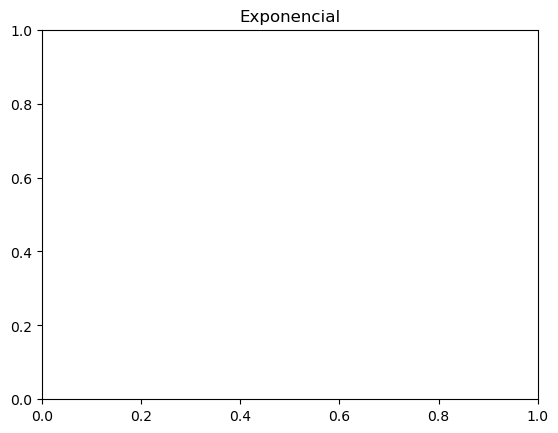

In [13]:
# Establece el título del gráfico
plt.title("Exponencial")

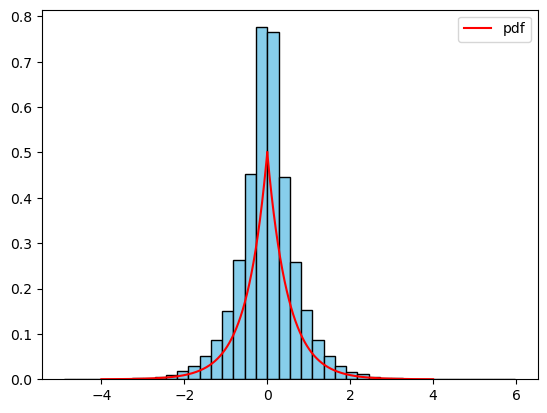

In [15]:
# Traza la función de densidad de probabilidad (pdf) de la distribución de Laplace usa
plt.plot(x1, f(x1), color="red")
# Rellena el área bajo la curva de la función de densidad con color azul claro y trans
plt.fill_between(x1, f(x1), color="skyblue", alpha=0.5)
# Traza otra línea para la función de densidad de probabilidad, usando otra serie de p
plt.plot(x2, f(x2), color="red", label="pdf")
# Rellena el área bajo la curva de la función de densidad con color rosa
plt.fill_between(x2, f(x2), color="pink")
# Traza un histograma de los datos generados con la función rlaplace, normalizado para
# El histograma se dibuja en color azul claro con bordes negros
plt.hist(rlaplace(100000), density=True, color="skyblue", bins=40, edgecolor="black")
# Muestra la leyenda del gráfico con las etiquetas definidas
plt.legend()
# Muestra el gráfico en pantalla
plt.show()